# 모델 평가
모델의 성능을 평가 -> 평가결과에 따라 프로세스를 다시 반복
- 다양한 평가지표가 있음 ex) accuracy_score: 정확도 측정(분류)
    - 회귀문제? Label이 실수 => 회귀에서 정확도 보는 것은 의미 없음
    - 예측한 값, 실제 값 사이의 오차가 얼마 정도 되는지
    
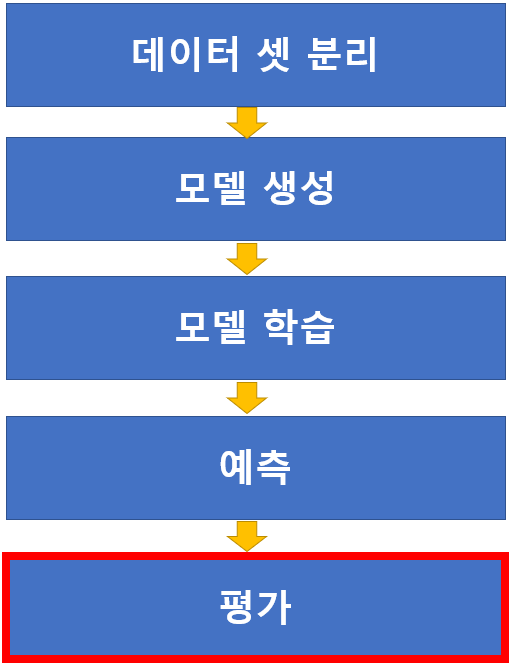

## 분류와 회귀의 평가방법
### 분류 평가 지표
1. 정확도 (Accuracy) - 전체 중, 몇개 맞추었는지
1. 정밀도 (Precision) - 예측한 것 중, 몇개 맞추었는지
1. 재현률 (Recall) 혹은 민감률 - 실제 중, 몇개 맞추었는지
1. F1점수 (F1 Score) - 재현률, 정밀도에 대한 조화 평균
1. PR Curve, AP - 그래프, 그래프를 그린 것을 숫자로 뽑아낸 것
1. ROC, AUC - 그래프, 그래프를 그린 것을 값으로 보여주는 것
- => 2 ~ 6번: 불균형 데이터에서 많이 사용
- 불균형 데이터? 예시) 이진 분류에서 악성 종양 데이터 10개, 양성 종양 데이터 90개일 때, 학습하지 않고 모두 '양성'이라고 결과 내어도 정확도는 90%가 됨(1번이 평가 지표일 경우)

### 회귀 평가방법
1. MSE (Mean Squared Error) - 오차 제곱한 것의 평균
1. RMSE (Root Mean Squared Error) - 오차 제곱 값의 평균에 루트 씌운 것
1. $R^2$ (결정계수) - 모델이 이 데이터를 얼마만큼 설명하는지. 0 ~ 1 사이의 숫자. 1에 가까울수록 좋음
- 1번, 2번 => 실제 값, 예측 값 사이의 오차의 제곱들을 평균 내서 평균적인 오차 보는 것
- 3번 => 모델이 예측한 것이 평균(대표값)으로 예측한 것보다 얼마나 좋은지를 수치화



### sckit-learn 평가함수 
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 기준
## 용어
- ### 이진 분류에서 양성(Positive)과 음성(Negative)
    - 양성: 예측하려는(찾으려는) 대상 - 보통 0
    - 음성: 예측하려는 대상이 아닌 것 - 보통 1
    - 예(대부분 불균형데이터가 많음 - 양성 데이터 양이 적은)
        - 암환자 분류 : 양성 - 암 환자, 음성 - 정상인
        - 스팸메일 분류 : 양성 - 스팸메일, 음성 - 정상메일
        - 금융사기 모델: 양성 - 사기거래, 음성 - 정상거래
        
## 정확도 (Accuracy)

$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(모델예측값, 정답)`

### Accuracy 평가지표의 문제
- 불균형 데이터의 경우, 정확한 평가지표가 될 수 없음
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%

## MNIST Data set
- MNIST(Modified National Institute of Standards and Technology database): 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [150]:
# 64 => 8 * 8 그림의 2차원 배열을 1차열 배열로
digits = load_digits()
X, y = digits['data'], digits['target']
X.shape, y.shape

((1797, 64), (1797,))

In [151]:
# 첫번째 그림
print(X[0].shape)
X[0]

(64,)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [152]:
# 첫번째 그림을 이미지 형태로 조회 -> '0'
# 각 구성 값은 1픽셀 대변(0 ~ 255 사이의 값)
no0 = X[0].reshape(8,8)
no0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

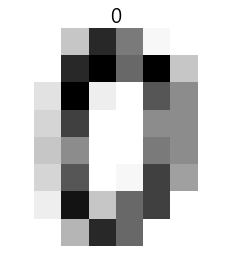

In [153]:
# 검은색 그림에 흰색 글씨를 반전시킴(cmap에서)
# 원래는 0 - 검은색, 255 - 1흰색
plt.imshow(no0, cmap='Greys')
plt.axis('off') # ticks 없애기
plt.title(y[0])
plt.show()

In [154]:
# 값의 구성 조회
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

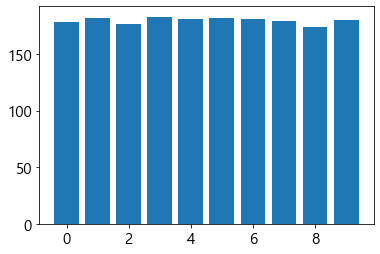

In [155]:
# 값의 구성을 막대 그래포르 그리기
cnt = np.unique(y, return_counts = True)
plt.bar(cnt[0], cnt[1])
plt.show()

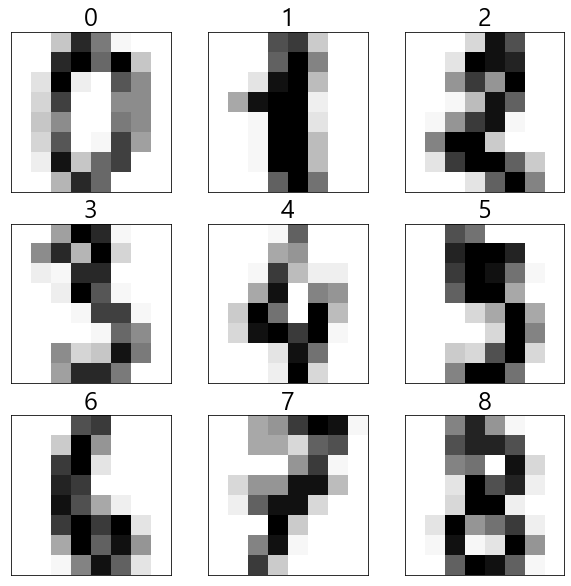

In [156]:
# 숫자 9개 반복문 사옹해서 조회
plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].reshape(8,8), cmap = 'Greys')  # 0 ~ 8
    plt.xticks([])
    plt.yticks([])
    plt.title(y[i], fontdict={'fontsize': 25})
    
plt.show()    

### 불균형 데이터셋으로 만들기
- MNIST를 가지고 '9'를 찾는 학습으로 변경(9 - 10%, 나머지 숫자 - 90%) => 불균형 데이터
- y를 9와 나머지로 변경
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [157]:
# y를 9와 나머지로 변경
# 9: True(1), 나머지: False(0)
y = y == 9

In [158]:
y.sum()

180

In [159]:
cnt2 = np.unique(y, return_counts = True)
cnt2

(array([False,  True]), array([1617,  180], dtype=int64))

In [160]:
# False + False + True
# 0 + 0 + 1

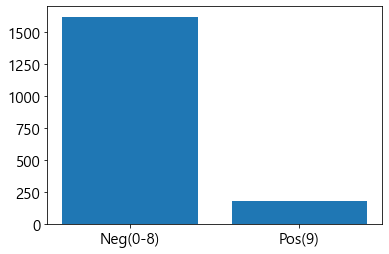

In [161]:
plt.bar(cnt2[0], cnt2[1])
plt.xticks([0,1], labels=['Neg(0-8)', 'Pos(9)'])
plt.show()

### 훈련, 테스트 데이터셋 분할

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
# np.unique(y_train, return_counts = True) - array([False, True]), array([1212, 135])
# np.unique(y_train, return_counts = True)[1] - array[1212, 135]

# False, True의 비율
print(np.unique(y_train, return_counts = True)[1]/y_train.size)

# False, True의 비율
print(np.unique(y_test, return_counts = True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델 정의
- 불균형 데이터 중, 무조건 양이 많은 데이터로 예측하는 모델
    - 위의 분할된 데이터를 바탕으로, 무조건 False로 예측하는 모델

In [163]:
# 모델 학습시키는 과정
model = MyModel()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [164]:
from sklearn.base import BaseEstimator

# BaseEstimator를 상속한 클래스 Mymodel 생성
class MyModel(BaseEstimator):
    # 어떻게 학습할 것인가
    def fit(self, X, y):
        cnt = np.unique(y, return_counts = True)
        max_idx = cnt[1].argmax()  # max 값의 index를 반환
        self.pred = cnt[0][max_idx]  # 최빈값을 instance 변수에 저장
        
    # 어떻게  예측할 것인가
    def predict(self, X):
        return np.full(shape = (X.shape[0], 1), fill_value = self.pred)

In [165]:
# pred_test의 구성값
np.unique(pred_test)

array([False])

In [166]:
# 데이터셋 나누기 전의 데이터로 진행
# 기존 데이터에서 3이 183개로 가장 많음
model = MyModel()
model.fit(X, digits['target'])
pred_X = model.predict(X)
np.unique(pred_X)

array([3])

In [167]:
# 정확도가 True, False 비율과 동일
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8997772828507795, 0.9)

In [168]:
# 기존 데이터로 조회하면 정확도 10
accuracy_score(digits['target'], pred_X)

0.1018363939899833

In [169]:
np.full(shape = (X_train.shape[0], 1), fill_value = True).shape

(1347, 1)

In [170]:
np.unique(pred_train) 

array([False])

## 혼동 행렬(Confusion Marix)
- 분류의 평가지표의 기준으로 사용
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있음
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제(Ground Truth) class, 1번 축: 예측 class
- (표에서 Predicted 기준)
- Actual == Predicted: True Negative, True Positive
- Actual != Predicted: False Positive, False Negative

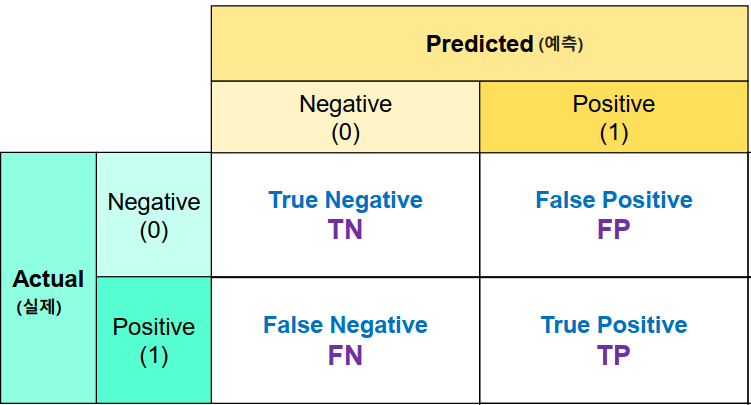

![img](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

## 이진 분류 평가점수
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율 => Ground Truth 위주
        - False Negative + True Positive / True Positive
    - **TPR**(True Positive Rate) 이라고도 함
    - 재현율 / 민감도가 높을 수록 모델의 성능이 좋은 것
    - 정밀도가 높을 수록, 재현율/민감도는 낮아짐(trade-off)
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) 
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
        - False Positive + True Positive / True Positive
    - **PPV**(Positive Predictive Value) 라고도 함
    - 정밀도가 높을 수록 모델의 성능이 좋은 것
    - 재현율이 높을 수록, 정밀도는 낲아짐(trade-off)
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할수록 높은 값 가지게 됨
    - F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있지 않고 ,둘다 좋다고 판단할 수 있는 근거
    
### 기타
- ### Specificity(특이도)
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 함
- ### Fall out(위양성률)
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 함
    - $ Fall-Out(FPF) = \cfrac{FP}{TN+FP}$

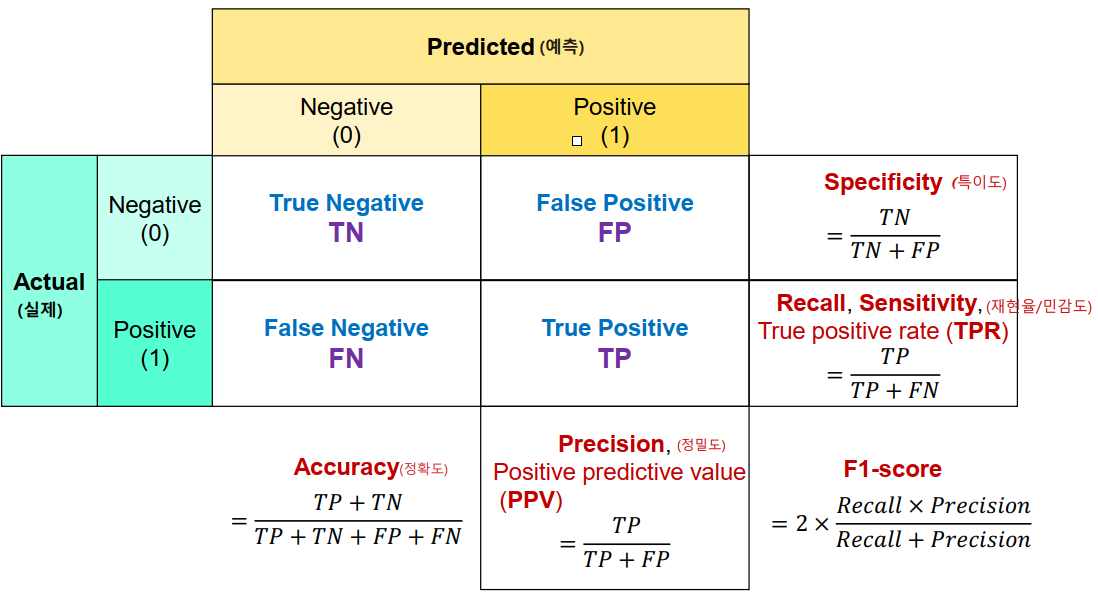

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여줌

###   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [171]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [172]:
# 예측값, 실제값(Ground Truth)
# (pred_train, y_train), (pred_test, y_test)
# 전부 0으로 예측
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test))

Train confusion matrix
[[1212    0]
 [ 135    0]]
--------------------------------------------------
Test confusion matrix
[[405   0]
 [ 45   0]]


In [173]:
# 분류 모델 생성 - 어떤 옵션 주면 그것에 따라서 찾는 모델(가짜모델)
# 분류 기준? 최빈값을 찾아라
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

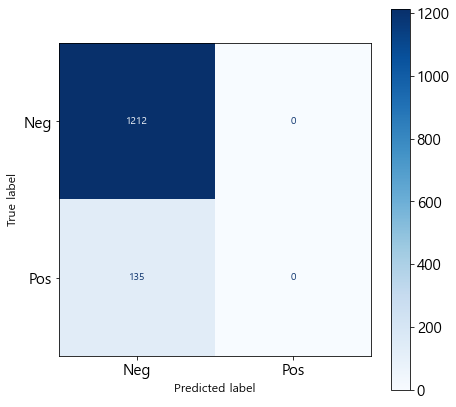

In [174]:
# 배열로 보았던 것을 그래프로 그려줌
fig, ax = plt.subplots(1,1, figsize=(7,7))
plot_confusion_matrix(dummy_model, # 학습시킬 모델
                      X_train, # X
                      y_train, # y
                      display_labels=['Neg', 'Pos'],
                      cmap="Blues",
                      ax = ax)
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [175]:
print("Accuracy")
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

Accuracy


(0.8997772828507795, 0.9)

In [176]:
print("Recall")  # 실제 9(양성) 중에 9로 잘 예측한 것
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

Recall


(0.0, 0.0)

In [177]:
print("Preicison")
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

Preicison


C:\Users\Jiyoon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [178]:
print("F1 score")
f1_score(y_train, pred_train), f1_score(y_test, pred_test)

F1 score


(0.0, 0.0)

### 머신러닝 모델을 이용해 학습

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
# 랜덤포레스트: Decision Tree 모델을 여러 개 만듬. 각자 학습(fit)하고, 각자 예측(predict) => 통합해서 최종 결과. Voting 방식
# 앙상블 모듈에 있으며, 속도 빠르고 성능도 좋은 편

In [180]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth = 3)
rf = RandomForestClassifier(n_estimators = 200)  # n_estimator: 트리 몇개 만들지 결정

In [181]:
# 모델 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 예측
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [182]:
# confusion matrix
print(confusion_matrix(y_train, pred_train_tree))
print(confusion_matrix(y_test, pred_test_tree))

[[1173   39]
 [  30  105]]
[[397   8]
 [ 15  30]]


In [183]:
print(confusion_matrix(y_train, pred_train_rf))
print(confusion_matrix(y_test, pred_test_rf))

[[1212    0]
 [   0  135]]
[[405   0]
 [ 12  33]]


In [184]:
print("Tree 모델 평가지표")
accuracy_score(y_test, pred_test_tree), recall_score(y_test, pred_test_tree), precision_score(y_test, pred_test_tree), f1_score(y_test, pred_test_tree)

Tree 모델 평가지표


(0.9488888888888889,
 0.6666666666666666,
 0.7894736842105263,
 0.7228915662650601)

In [185]:
print("RandomForest 모델 평가지표")
accuracy_score(y_test, pred_test_rf), recall_score(y_test, pred_test_rf), precision_score(y_test, pred_test_rf), f1_score(y_test, pred_test_rf)

RandomForest 모델 평가지표


(0.9733333333333334, 0.7333333333333333, 1.0, 0.846153846153846)

### classification_report()


In [186]:
# False가 양성일 때의 기준 / True가 양성일 때의 기준
# marco avg: 산술 평균 / weighted avg - 가중 평균
from sklearn.metrics import classification_report
result = classification_report(y_test, pred_test_rf, target_names = ["pos(not 9)", "pos(9)"])
print(result)

              precision    recall  f1-score   support

  pos(not 9)       0.97      1.00      0.99       405
      pos(9)       1.00      0.73      0.85        45

    accuracy                           0.97       450
   macro avg       0.99      0.87      0.92       450
weighted avg       0.97      0.97      0.97       450



## 재현율과 정밀도의 관계

**이진 분류의 경우, Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있음**

#### 재현율이 더 중요한 경우
- 재현율: 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FN(False Negative)를 낮추는데 초점
- 재현율 높이는 방법? Posivie, Negative로 분류할 때 헷갈리는 것을 'Positive'로 분류
- 암환자 판정 모델, 보험사기적발 모델

#### 정밀도가 더 중요한 경우
- 정밀도: Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FP(False Positive)를 낮추는데 초점
- 정밀도 높이는 방법? Posivie, Negative로 분류할 때 헷갈리는 것을 'Negative'로 분류
- 스팸메일 판정


## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도 or 재현율을 특히 강조해야 하는 상황일 경우, 임계값 변경 통해 평가 수치 올릴 수 있음
- 단, 극단적으로 임계점 올리거나 낮춰 한쪽 점수 높이면 안됨. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 됨)
    
### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값 높이면, 양성으로 예측하는 기준을 높여(엄격히 해) 음성으로 예측되는 샘플 많아짐. 그래서 정밀도는 높아지고 재현율은 낮아짐.
- 임계값 낮추면, 양성으로 예측하는 기준이 낮아져 양성으로 예측되는 샘플 많아짐. 그래서 재현율은 높아지고 정밀도는 낮아짐
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 음의 상관관계**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 양의 상관관계


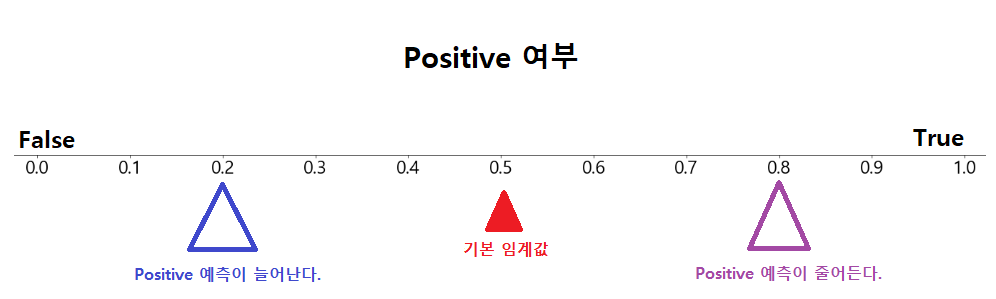

### 임계값 변화에 따른 recall, precision 변화

In [187]:
# 예측 
p = tree.predict(X_test[:3])
p

array([ True, False, False])

In [188]:
# 예측 확률 - [False일 확률, True일 확률]
p = tree.predict_proba(X_test[:3])
p

array([[0.23529412, 0.76470588],
       [0.95876289, 0.04123711],
       [0.98648649, 0.01351351]])

In [189]:
from sklearn.metrics import precision_recall_curve
pos_proba = tree.predict_proba(X_test)[:, 1]  # True인 값만 뽑아내기
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [190]:
# threshold - 임계값
# 임계값이 올라굴수록 Positive 수 줄어듬(recall 값 떨어짐) 
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions[:-1],
    'recall':recalls[:-1]
})

,threshold,precision,recall
0,0.013514,0.176471,1.000000
1,0.021739,0.222826,0.911111
2,0.041237,0.238095,0.888889
3,0.047619,0.660000,0.733333
4,0.360000,0.733333,0.733333
5,0.560000,0.789474,0.666667
6,0.764706,0.870968,0.600000


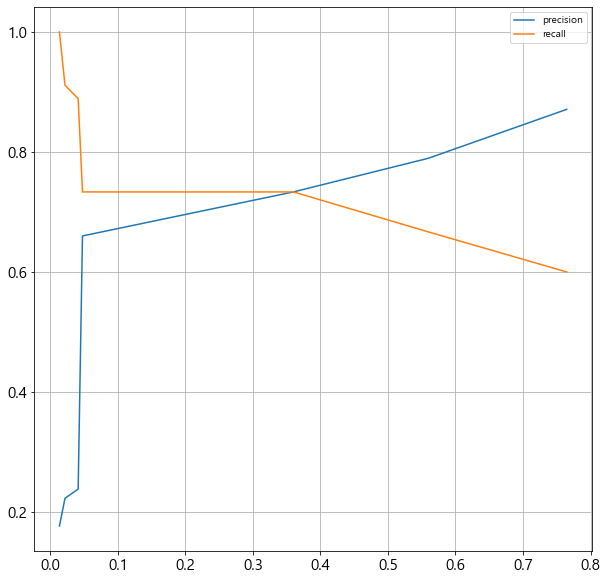

In [191]:
# 그래프 - threshold 변화에 따른 recall, precision 변화
plt.figure(figsize=(10,10))
plt.plot(thresholds, precisions[:-1], label='precision')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.legend()
plt.grid(True)
plt.show()

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값 변경할 수 있음

In [192]:
from sklearn.preprocessing import Binarizer

In [193]:
# 예시 - 하나의 데이터에 대한 예측 결과. 5개 중에 뭐다
# Binarizer 기본값 0: 0보다 작으면 0, 0보다 크면 1 => 2개 분류로 나눠줌
example = [[0.3, 0.5, 0.7, 0.4, 0.6]]
bi = Binarizer()
bi.fit(example)
bi.transform(example)

array([[1., 1., 1., 1., 1.]])

In [194]:
# threshold - 0.5로 변경
example = [[0.3, 0.5, 0.7, 0.4, 0.6]]
bi = Binarizer(threshold=0.5)
bi.fit(example)
bi.transform(example)

array([[0., 0., 1., 0., 1.]])

In [195]:
# threshold - 0.8로 변경
example = [[0.3, 0.5, 0.7, 0.4, 0.6]]
bi = Binarizer(threshold=0.8)
bi.fit(example)
bi.transform(example)

array([[0., 0., 0., 0., 0.]])

In [196]:
# 머신러닝 모델에 적용
pos_proba = tree.predict_proba(X_test)  # positive들의 확률
binarizer = Binarizer(threshold = 0.5)
binarizer = Binarizer(threshold = 0.01)
binarizer = Binarizer(threshold = 0.1)
binarizer = Binarizer(threshold = 0.6)
binarizer.fit(pos_proba)
predict = binarizer.transform(pos_proba)[:, 1]
accuracy_score(pred_test_tree, predict)

recall_score(y_test, predict), precision_score(y_test, predict)

(0.6, 0.8709677419354839)

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 0~1사이 모든 임계값에 대한 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 0 → 1 변화할 때, 두 값의 변화를 선그래프로 나타냄
    - Recall이 올라갈때, Precision이 유지될 수록 좋은 성능 가진 모델
    - X축인 Recall이 올라가는 것? threshold가 낮아지는 것(Positive라고 예측하는 개수가 많아지는 것)
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가
    - PR Curve 선 아래 면적 계산한 값으로, 높을수록 성능이 우수
    - 0 ~ 1 사이 값. 최대값은 1(recall: 0 ~ 1, precision  0~ 1)
    - AP Score가 넓다는 것? Recall이 증가함에 따라 Preicision이 감소폭이 적다는 것
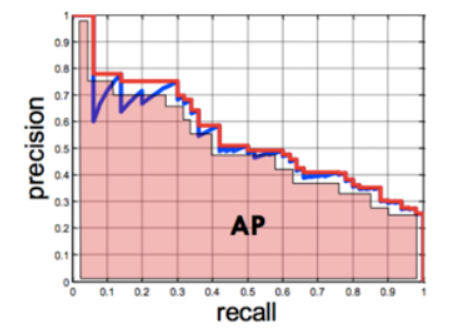   

In [197]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score

pos_proba = tree.predict_proba(X_test)[:, 1]

# y, pos_예측확률
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)

# threshold는 0부터 시작 ~ 1에서 종료. threshold가 1일 때, recall/precision 값은 나오지만 threshold가 1일때는 나오지 않음 => threshold 개수가 1개 적음
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [198]:
# threshold 1개 append
thresholds = np.append(thresholds, 1)
thresholds

array([0.01351351, 0.02173913, 0.04123711, 0.04761905, 0.36      ,
       0.56      , 0.76470588, 1.        ])

In [199]:
pd.DataFrame({
    "Threshold" : thresholds,
    "recall" : recalls,
    "precision" : precisions
})

,Threshold,recall,precision
0,0.013514,1.000000,0.176471
1,0.021739,0.911111,0.222826
2,0.041237,0.888889,0.238095
3,0.047619,0.733333,0.660000
4,0.360000,0.733333,0.733333
5,0.560000,0.666667,0.789474
6,0.764706,0.600000,0.870968
7,1.000000,0.000000,1.000000


No handles with labels found to put in legend.


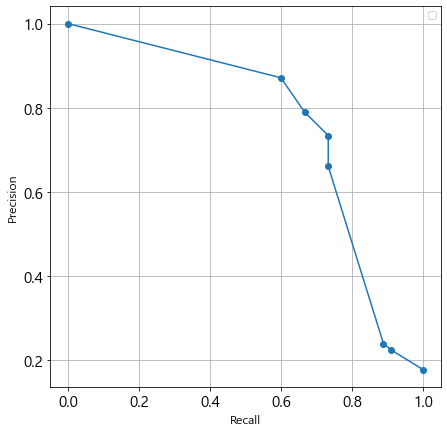

In [200]:
# 그래프 그리기
plt.figure(figsize=(7,7))

# X축: recall, Y: precision
plt.plot(recalls, precisions, marker = 'o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()

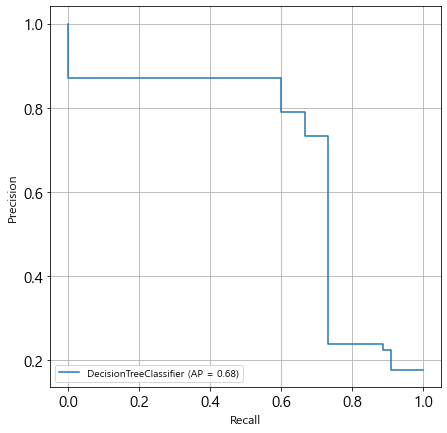

In [201]:
# PR Curve - plot_precision_curve
fig, ax = plt.subplots(1,1, figsize=(7,7))
# plt.gca() - 현재 그림을 그리는 축(axis)을 뽑아줌(Get Current Axis)
plot_precision_recall_curve(tree, # 모델
                           X_test, # X값
                           y_test, # y값
                           ax = ax)
plt.grid(True)
plt.show()

In [202]:
# AP Score (y, pos_예측확률)
average_precision_score(y_test, pos_proba)

0.6817761153656446

## TODO
- train set에 대해 PR Curve, AP Score 출력
- DataFrame으로 PR Curve 반환값 생성

In [208]:
pos_proba_train = tree.predict_proba(X_train)[:, 1]

precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, pos_proba_train)
thresholds_train = np.append(thresholds_train, 1)

In [204]:
# DataFrame
pd.DataFrame(dict(threshold=thresholds_train, recall = recalls_train, precision = precisions_train))

,threshold,recall,precision
0,0.001739,1.000000,0.100223
1,0.013514,0.992593,0.173575
2,0.021739,0.977778,0.211538
3,0.041237,0.970370,0.226644
4,0.047619,0.851852,0.605263
5,0.360000,0.844444,0.674556
6,0.560000,0.777778,0.729167
7,0.764706,0.674074,0.764706
8,1.000000,0.000000,1.000000


In [ ]:
plt.figure(figsize=(7,7))
ax = plt.gca()  # get current axes
plot_precision_recall_curve(tree, X_train, y_train, ax = ax)
plt.grid(True)
plt.show()

In [ ]:
# AP Score
average_precision_score(y_train, pos_proba_train)

In [ ]:
# 위의 랜덤 포레스트
pos_proba_train_rf = rf.predict_proba(X_train)[:, 1]
precisions_train_rf, recalls_train_rf, thresholds_train_rf = precision_recall_curve(y_train, pos_proba_train_rf)

In [ ]:
# DataFrame - RF
pd.DataFrame(dict(threshold=np.append(thresholds_train_rf, 1), recall = recalls_train_rf, precision = precisions_train_rf))

In [210]:
# AP Score - rf
average_precision_score(y_train ,pos_proba_train_rf)

1.0

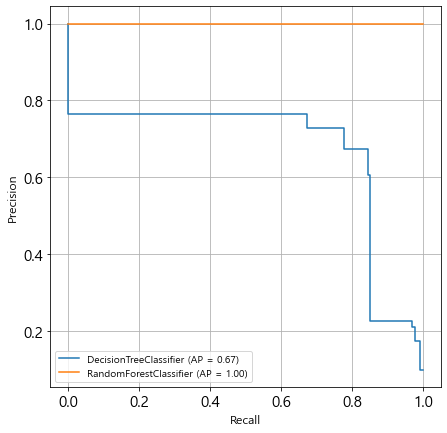

In [212]:
# PR Curve - 2개 합쳐서 그리기
plt.figure(figsize=(7,7))
ax = plt.gca()  # get current axes

plot_precision_recall_curve(tree, X_train, y_train, ax = ax)
plot_precision_recall_curve(rf, X_train, y_train, ax = ax)

plt.legend()
plt.grid(True)
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

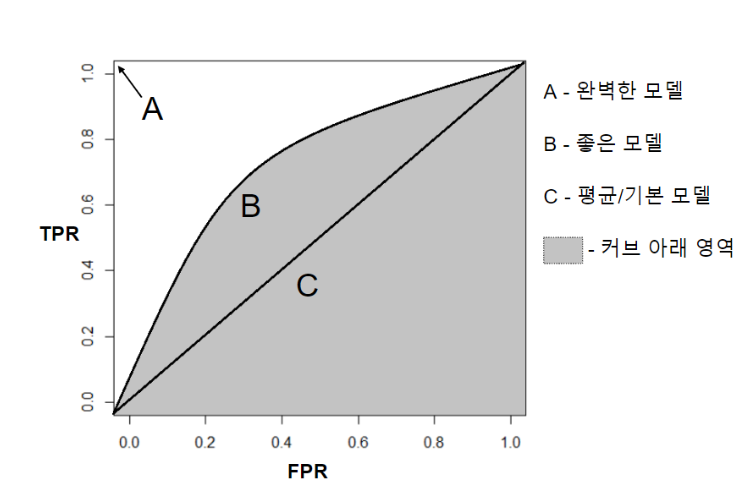

- 가장 완벽한 것은 FPR이 0이고 TPR이 1일 때 
- 일반적으로 FPR이 작을 때, (0에 가까울 때) TPR이 높은 경우가 좋은 상황
- 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델로 평가

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - PR Curve
- ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개, 고양이 분류)
- PR curve(Precision Recall 커브): 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [214]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

pos_proba_tree = tree.predict_proba(X_test)[:, 1]
pos_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, pos_proba_tree)  # y, pos_예측확률
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, pos_proba_rf)

fpr_rf.shape, tpr_rf.shape, threshold_rf.shape

((45,), (45,), (45,))

In [216]:
# 데이터 프레임
pd.DataFrame(dict(th = threshold_tree, fpr = fpr_tree, tpr = tpr_tree))

,th,fpr,tpr
0,1.764706,0.000000,0.000000
1,0.764706,0.009877,0.600000
2,0.360000,0.029630,0.733333
3,0.047619,0.041975,0.733333
4,0.041237,0.316049,0.888889
5,0.021739,0.353086,0.911111
6,0.013514,0.518519,1.000000
7,0.001739,1.000000,1.000000


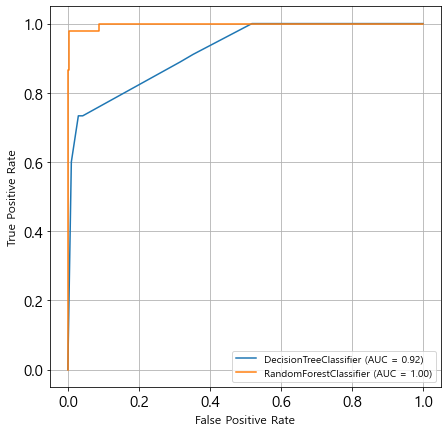

In [217]:
# ROC Curve
plt.figure(figsize=(7,7))
ax = plt.gca()
plot_roc_curve(tree, X_test, y_test, ax = ax)
plot_roc_curve(rf, X_test, y_test, ax = ax)
plt.grid(True)
plt.show()

In [218]:
# AUC Score -> rabdin forest 모델 쓰는게 더 적당
print("tree:", roc_auc_score(y_test, pos_proba_tree))
print("random forest:", roc_auc_score(y_test, pos_proba_rf))

tree: 0.9203840877914952
random forest: 0.9978052126200274
